# Question 2 : KNN Classifier for Mushroom Data Set

First, we will import the required libraries like numpy, pandas, mathplot, etc. and sklearn to find F1 score, Accuracy, confusion_matrix, etc.

## Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Understanding the data

In [26]:
train_data=pd.read_csv('Datasets/q2/train.csv',header=None)
train_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,c,l
1,e,k,s,g,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g
2,e,b,s,g,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,s,g
3,e,s,f,g,f,n,f,c,n,n,...,s,w,w,p,w,o,p,n,v,u
4,e,f,f,g,f,n,f,w,b,p,...,f,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,p,x,y,y,f,f,f,c,b,p,...,k,n,n,p,w,o,l,h,y,g
4492,p,f,y,e,f,y,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
4493,p,x,y,g,f,f,f,c,b,h,...,k,p,p,p,w,o,l,h,y,p
4494,p,x,y,e,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d


In [27]:
test_data=pd.read_csv('Datasets/q2/test.csv',header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,x,y,n,t,n,f,c,b,w,t,...,s,w,w,p,w,o,p,n,y,d
1,b,y,y,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
2,f,y,g,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,n,y,d
3,f,s,g,f,n,f,w,b,n,t,...,f,w,w,p,w,o,e,k,s,g
4,x,s,y,t,l,f,c,b,g,e,...,s,w,w,p,w,o,p,n,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x,s,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,n,v,u
996,f,f,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,k,a,g
997,x,f,g,f,n,f,w,b,h,t,...,s,w,w,p,w,o,e,k,s,g
998,f,y,n,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,k,y,d


In [28]:
test_label=pd.read_csv('Datasets/q2/test_labels.csv',header=None)
test_label

,0
0,e
1,e
2,e
3,e
4,e
...,...
995,p
996,e
997,e
998,e


## Originals labels all values of data set

In [29]:
original_data_labels=[ ['e','p'],
                      ['b','c','x','f','k','s'],
                      ['f','g','y','s'],
                      ['n','b','c','g','r','p','u','e','w','y'],
                      ['f','t'],
                      ['a','l','c','y','f','m','n','p','s'],
                      ['n','f','d','a'],
                      ['c','w','d'],
                      ['n','b'],
                      ['k','n','b','h','g','r','o','p','u','e','w','y'],
                      ['t','e'],
                      ['b','c','u','e','z','r'],
                      ['s','k','y','f'],
                      ['f','y','k','s'],
                      ['y','w','e','p','o','g','c','b','n'],
                      ['y','w','e','p','o','g','c','b','n'],
                      ['u','p'],
                      ['n','o','w','y'],
                      ['t','o','n'],
                      ['l','f','e','c','n','p','s','z'],
                      ['y','w','u','o','r','h','b','n','k'],
                      ['y','v','s','n','c','a'],
                      ['g','l','m','p','u','w','d'] ]

## Data Preproccessing

### One Hot Encoding

A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

eg: l=[red,green,blue]

red=100,	green=010,	blue=001


In [36]:
data=pd.DataFrame(columns=None)

for i in range(23):
    df = pd.get_dummies(train_data[i], prefix='', prefix_sep='')
    df = df.T.reindex(original_data_labels[i]).T.fillna(0)
    data=pd.concat([data,df],axis=1)
    
test=pd.DataFrame(columns=None)
for i in range(22):
    df = pd.get_dummies(test_data[i], prefix='', prefix_sep='')
    df = df.T.reindex(original_data_labels[i+1]).T.fillna(0)
    test=pd.concat([test,df],axis=1)

In [40]:
K=3
maxacc=0

## Dividing dataset into two parts validation and train

In [41]:
train, validate = np.split(pd.DataFrame(data).to_numpy(), [int(0.75*len(data))])

In [42]:
for KK in range(3,10,2):
    correct=0
    wrong=0
    for i in range(len(validate)):
        dists=[]
        for j in range(len(train)):
            dist = np.linalg.norm(validate[i][2:]-train[j][2:])
            dists.append([dist,[train[j][0],train[j][1]]])
        dists.sort()
        edible=0
        poisonous=0
        for k in range(KK):
            if(dists[k][1]==[1,0]):
                edible+=1
            else:
                poisonous+=1
        ans=[]
        if(edible>poisonous):
            ans=[1,0]
        else:
            ans=[0,1]

        if(validate[i][0]==ans[0] and validate[i][1]==ans[1]):
            correct+=1
        else:
            wrong+=1

    acc=correct/1124*100
    print(KK,acc)
    if(acc>maxacc):
        maxacc=acc
        K=KK

3 100.0
5 99.73309608540926
7 99.73309608540926
9 99.8220640569395



## Manhatten Distance <br>
# d= ${\sum_{i=1}^{N}{\left|{x_i}-{y_i}\right|}}$




## Testing

In [72]:
 #using manhattan
correct=0
wrong=0
for i in range(len(validate)):
    dists=[]
    for j in range(len(train)):
        dist = np.linalg.norm(validate[i][2:]-train[j][2:],ord=1)
        dists.append([dist,[train[j][0],train[j][1]]])
    dists.sort()
    edible=0
    poisonous=0
    for k in range(KK):
        if(dists[k][1]==[1,0]):
            edible+=1
        else:
            poisonous+=1
    ans=[]
    if(edible>poisonous):
        ans=[1,0]
    else:
        ans=[0,1]

    if(validate[i][0]==ans[0] and validate[i][1]==ans[1]):
        correct+=1
    else:
        wrong+=1

acc=correct/1124*100
print(KK,acc)

9 100.0


### Euclidean Distance is used in the testing

In [46]:
train=pd.DataFrame(data).to_numpy()
test=pd.DataFrame(test).to_numpy()
#print(self.K)

ans=[]

for i in range(len(test)):
    dists=[]
    for j in range(len(data)):
        dist = np.linalg.norm(test[i]-train[j][2:]) #Euclidean Distance
        dists.append([dist,[train[j][0],train[j][1]]])
    dists.sort()
    edible=0
    poisonous=0
    for k in range(K):
        #print(dists[k][1])
        if(dists[k][1]==[1,0]):
            edible+=1
        else:
            poisonous+=1
    #print(edible,poisonous)
    if(edible>poisonous):
        ans.append('e')
    else:
        ans.append('p')

In [47]:
test_labels = list()
with open("./Datasets/q2/test_labels.csv") as f:
    for line in f:
        test_labels.append(line.strip())
print (accuracy_score(test_labels, ans))

1.0


## Accuracy Score

In [58]:
ans

['e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'p',
 'p',
 'e',
 'e',
 'e',
 'e',
 'p',
 'p',
 'p',
 'p',
 'e',
 'p',
 'e',
 'e',
 'p',
 'e',
 'e',
 'e',
 'p',
 'p',
 'e',
 'e',
 'p',
 'e',
 'p',
 'e',
 'p',
 'e',
 'e',
 'e',
 'e',
 'e',
 'p',
 'e',
 'e',
 'e',
 'p',
 'p',
 'p',
 'e',
 'p',
 'e',
 'p',
 'p',
 'e',
 'p',
 'p',
 'e',
 'p',
 'e',
 'p',
 'p',
 'e',
 'p',
 'e',
 'p',
 'p',
 'e',
 'e',
 'e',
 'p',
 'e',
 'p',
 'p',
 'e',
 'p',
 'p',
 'p',
 'e',
 'p',
 'e',
 'e',
 'e',
 'p',
 'p',
 'p',
 'e',
 'e',
 'e',
 'e',
 'p',
 'e',
 'e',
 'e',
 'e',
 'e',
 'p',
 'p',
 'p',
 'e',
 'p',
 'p',
 'e',
 'e',
 'p',
 'e',
 'e',
 'e',
 'p',
 'e',
 'p',
 'e',
 'p',
 'e',
 'p',
 'p',
 'e',
 'e',
 'e',
 'p',
 'e',
 'p',
 'p',
 'e',
 'e',
 'e',
 'p',
 'e',
 'p',
 'p',
 'p',
 'p',
 'e',
 'e',
 'p',
 'e',
 'e',
 'e',
 'e',
 'e',
 'p',
 'e',
 'e',
 'p',
 'p',
 'p',
 'e',
 'p',
 'p',
 'p',
 'e',
 'p',
 'p',
 'e',
 'p',
 'e',
 'e',
 'e',
 'p',
 'e',
 'p',
 'p',
 'p',
 'e',
 'e',
 'p',
 'e',
 'e',
 'p',
 'e',
 'p'

In [71]:
accuracy_score(test_labels, ans)

1.0

## Confusion Matrix

In [49]:
confusion_matrix(test_labels, ans)

array([[505,   0],
       [  0, 495]])

## Precision Score

In [55]:
print(precision_score(test_labels, ans, average='macro'),
precision_score(test_labels, ans, average='micro'),
precision_score(test_labels, ans, average='weighted'))

1.0 1.0 1.0


## Recall Score

In [56]:
print(recall_score(test_labels, ans, average='macro'),
recall_score(test_labels, ans, average='micro'),
recall_score(test_labels, ans, average='weighted'))

1.0 1.0 1.0


## F1 Score

In [57]:
print(f1_score(test_labels, ans, average='macro'),
f1_score(test_labels, ans, average='micro'),
f1_score(test_labels, ans, average='weighted'))

1.0 1.0 1.0


### Accuracy calculate above during training

In [67]:
K=[3, 5, 7 ,9]
Acc=[1.00,0.9973309608540926, 0.9973309608540926 ,0.998220640569395]

## Accuracy vs K plot

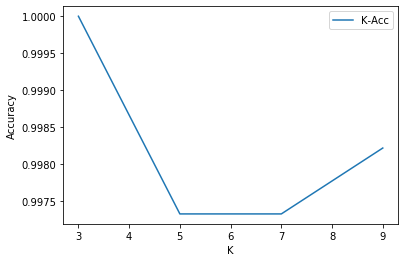

In [68]:
plt.plot(K,Acc,label='K-Acc')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

## KNN using Scikit learn

In [ ]:

train_data_frame = pd.read_csv('Datasets/q2/train.csv',header=None)

X = train_data_frame.iloc[:, 1:126].values        
Y = train_data_frame.iloc[:, 0].values         

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
series_1 = pd.Series([X_train])
series_2 = pd.Series([Y_train])
dataframe1=pd.concat([series_1, series_2],axis=1)
neighbour = KNeighborsClassifier(n_neighbors=3)
neighbour.fit(X_train, Y_train)
p = neighbour.predict(X_test)
print (confusion_matrix(Y_test,p))
print (classification_report(Y_test,p))
print (accuracy_score(Y_test,p))